In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = "D:\\OneDrive\\Desktop\\PhysicsResearch\\20230718 Dynabead M270 v vs f\\VvsF-videos 20230718\\raw"

In [3]:
freqs_to_v = dict()
for dir in os.listdir(path):
    freqs_to_v[int(dir[:2])] = []

In [4]:
for dir in os.listdir(path):
    freq = int(dir[:2])
    for file in os.listdir(path + "\\" + dir):
        data = pd.read_csv(path + "\\" + dir + "\\" + file)
        xs = data["x_um"].to_numpy()
        ys = data["y_um"].to_numpy()
        ts = data["time"].to_numpy()
        initial_x = xs[0]
        initial_y = ys[0]
        final_x = xs[-1]
        final_y = ys[-1]
        duration = ts[-1] - ts[0]
        freqs_to_v[freq].append(np.sqrt((final_x - initial_x)**2 + (final_y - initial_y)**2) / duration)
        

In [5]:
freqs = np.array(list(freqs_to_v.keys()))
actual_freqs = freqs * 0.9
mean_vs = np.array([np.array(freqs_to_v[freq]).mean() for freq in freqs])
std_vs = np.array([np.array(freqs_to_v[freq]).std() for freq in freqs])
expected_vs = actual_freqs * 10
percent_errors = abs(mean_vs - expected_vs) / expected_vs * 100


In [6]:
percent_errors

array([ 5.65080215,  3.369982  ,  1.47411445,  3.93609957,  4.39863683,
        8.28883346,  3.42861754,  1.50121112,  0.976698  ,  6.36275549,
        7.72766158, 16.34329593, 29.43388855, 43.44101021, 58.51204037,
       66.78235527, 72.70195884, 76.49614393, 80.46191191, 85.43138836,
       86.70107135, 85.28568397, 85.05515542, 89.49349633, 89.5942021 ,
       88.80052398, 89.40484397, 89.10360129, 89.23361117, 91.89401145])

In [7]:
result = pd.DataFrame(columns=["freq", "actual_freq", "mean_v", "std_v", "expected_v", "percent_error"])
result["freq"] = freqs
result["actual_freq"] = actual_freqs
result["mean_v"] = mean_vs
result["std_v"] = std_vs
result["expected_v"] = expected_vs
result["percent_error"] = percent_errors


In [8]:
result

,freq,actual_freq,mean_v,std_v,expected_v,percent_error
0,1,0.9,9.508572,1.918439,9.0,5.650802
1,2,1.8,18.606597,2.595318,18.0,3.369982
2,3,2.7,27.398011,4.685703,27.0,1.474114
3,4,3.6,34.583004,7.606524,36.0,3.936100
4,5,4.5,46.979387,6.827167,45.0,4.398637
5,6,5.4,49.524030,10.717518,54.0,8.288833
6,7,6.3,65.160029,13.698047,63.0,3.428618
7,8,7.2,70.919128,12.224655,72.0,1.501211
8,9,8.1,80.208875,13.909612,81.0,0.976698
9,10,9.0,84.273520,23.607538,90.0,6.362755


In [9]:
old_result = pd.read_csv("D:\\OneDrive\\Desktop\\PhysicsResearch\\20230718 Dynabead M270 v vs f\\dia_range_2_12.csv")

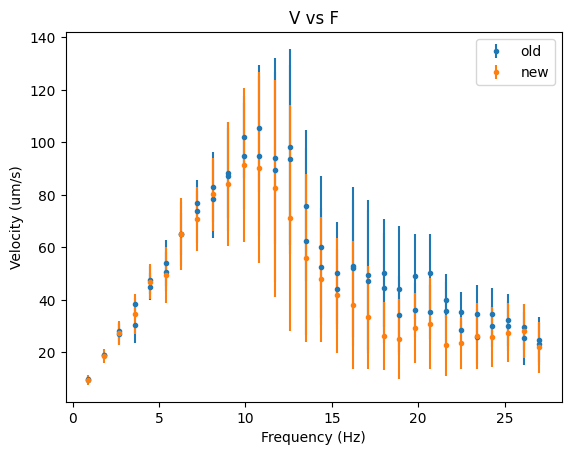

In [10]:
plt.errorbar(old_result["actual_frequency"], old_result["mean_velocity"], 
             yerr=old_result["standard_deviation"], fmt='.', label="old",)
plt.errorbar(actual_freqs, mean_vs, yerr=std_vs, fmt='.', label="new")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Velocity (um/s)")
plt.title("V vs F")
plt.legend()
plt.show()